## Load the Dataset

In [1]:
import pandas as pd
''' Function to load dataset'''
def load_data(file_path):
 data=pd.read_csv(file_path)
 return data

df=load_data('metabolic_dataset.csv')
df.head(5)

,Metabolite,Condition,Replicate,Concentration,Units
0,Metabolite1,Control,1,80.281301,μM
1,Metabolite1,Control,2,84.658008,μM
2,Metabolite1,Control,3,75.872092,μM
3,Metabolite1,Control,4,75.872174,μM
4,Metabolite1,Control,5,84.938922,μM


## Handle Missing Values

In [2]:
'''Function to check missing values'''
def handle_missing_values(data):
    print(data.isnull().sum())                   #check for missing values
    def fill_missing_values(group):              #function to fill missing values
        return group.fillna(group.median())
     # to fill missing values with median concentration   
    data['Concentration']= data.groupby(['Metabolite','Condition'])['Concentration'].transform(fill_missing_values)
    return data

handle_missing_values(df)    

Metabolite       0
Condition        0
Replicate        0
Concentration    5
Units            0
dtype: int64


,Metabolite,Condition,Replicate,Concentration,Units
0,Metabolite1,Control,1,80.281301,μM
1,Metabolite1,Control,2,84.658008,μM
2,Metabolite1,Control,3,75.872092,μM
3,Metabolite1,Control,4,75.872174,μM
4,Metabolite1,Control,5,84.938922,μM
...,...,...,...,...,...
95,Metabolite10,Treatment,1,94.497348,μM
96,Metabolite10,Treatment,2,81.219333,μM
97,Metabolite10,Treatment,3,83.688874,μM
98,Metabolite10,Treatment,4,82.007579,μM


## Standardize Unit

In [3]:
def standardized_units(data):
    mask=data['Units']=='mM'                #chk the mM units
    df.loc[mask,'Concentration']*=1000      #multiply their concentration with 1000
    data['Units']='uM'                      #change the unit to uM
    return data

standardized_units(df)    

,Metabolite,Condition,Replicate,Concentration,Units
0,Metabolite1,Control,1,80.281301,uM
1,Metabolite1,Control,2,84.658008,uM
2,Metabolite1,Control,3,75.872092,uM
3,Metabolite1,Control,4,75.872174,uM
4,Metabolite1,Control,5,84.938922,uM
...,...,...,...,...,...
95,Metabolite10,Treatment,1,94.497348,uM
96,Metabolite10,Treatment,2,81.219333,uM
97,Metabolite10,Treatment,3,83.688874,uM
98,Metabolite10,Treatment,4,82.007579,uM


## Identify and Handle Outliers

In [4]:
def handle_outliers(data):
    def replace_outliers(group):
       # Detect the outliers
        q1 = group.quantile(0.25)
        q3 = group.quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr

       # Replace the outliers
        group[(group<lower)|(group>upper)]=group.median()
        return group
    data['Concentration']=data.groupby(['Metabolite','Condition'])['Concentration'].transform(replace_outliers)
    return data

handle_outliers(df)

,Metabolite,Condition,Replicate,Concentration,Units
0,Metabolite1,Control,1,80.281301,uM
1,Metabolite1,Control,2,84.658008,uM
2,Metabolite1,Control,3,75.872092,uM
3,Metabolite1,Control,4,75.872174,uM
4,Metabolite1,Control,5,84.938922,uM
...,...,...,...,...,...
95,Metabolite10,Treatment,1,82.007579,uM
96,Metabolite10,Treatment,2,81.219333,uM
97,Metabolite10,Treatment,3,83.688874,uM
98,Metabolite10,Treatment,4,82.007579,uM


## Calculate Summary Statistics

In [5]:
def calculate_summary(data):
    summary = data.groupby(['Metabolite','Condition'])['Concentration'].agg(['mean','median','std']).reset_index()
    return summary

calculate_summary(df)    

,Metabolite,Condition,mean,median,std
0,Metabolite1,Control,80.324499,80.281301,4.464336
1,Metabolite1,Treatment,74.719990,74.719990,0.004087
2,Metabolite10,Control,62.371444,62.048568,0.659852
3,Metabolite10,Treatment,82.186189,82.007579,0.906722
4,Metabolite2,Control,47.547589,47.547589,0.796456
5,Metabolite2,Treatment,49.955735,50.356504,6.000106
6,Metabolite3,Control,20.091708,19.783831,0.691423
7,Metabolite3,Treatment,43.169796,42.719539,6.465101
8,Metabolite4,Control,51.799399,52.060923,0.658357
9,Metabolite4,Treatment,48.801217,48.900887,0.752712


## Group and Aggregate Data

In [6]:
def group_and_aggregate(data):
    return data.groupby(['Metabolite','Condition'])['Concentration'].mean().reset_index()

group_and_aggregate(df)    

,Metabolite,Condition,Concentration
0,Metabolite1,Control,80.324499
1,Metabolite1,Treatment,74.719990
2,Metabolite10,Control,62.371444
3,Metabolite10,Treatment,82.186189
4,Metabolite2,Control,47.547589
5,Metabolite2,Treatment,49.955735
6,Metabolite3,Control,20.091708
7,Metabolite3,Treatment,43.169796
8,Metabolite4,Control,51.799399
9,Metabolite4,Treatment,48.801217


## Data Visualization

### Box Plot using Seaborn

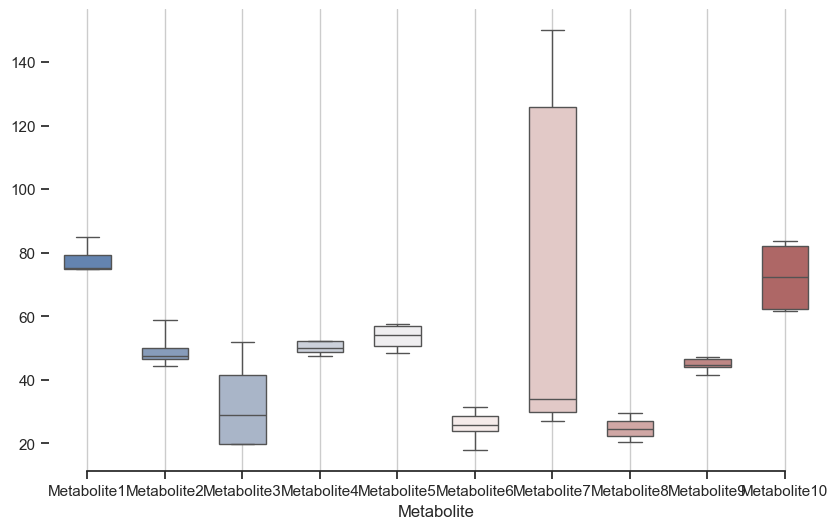

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks")
fig, ax = plt.subplots(figsize=(10, 6))
# Plot the orbital period with horizontal boxes
sns.boxplot(
    data=df, x="Metabolite", y="Concentration",hue="Metabolite",
    whis=[0, 100], width=.6, palette="vlag", ax=ax
)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

### Bar Plot using Matplotlib

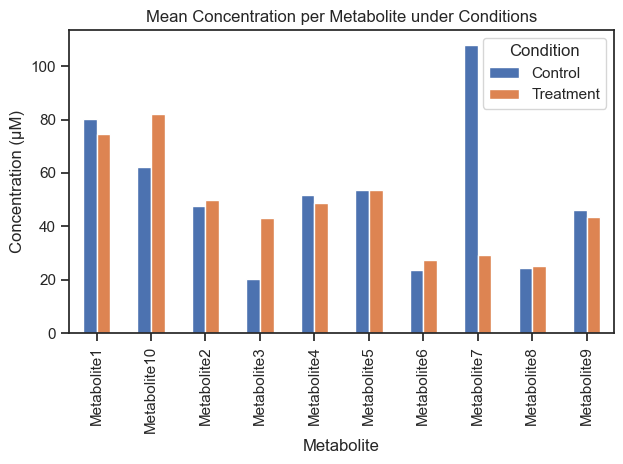

In [8]:
import matplotlib.pyplot as plt

def plot_matplotlib(df):
    mean_df = df.groupby(['Metabolite', 'Condition'])['Concentration'].mean().unstack()
    mean_df.plot(kind='bar')
    plt.title("Mean Concentration per Metabolite under Conditions")
    plt.ylabel("Concentration (µM)")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

plot_matplotlib(df)


### Line Plot using Plotly

In [9]:
import plotly.express as px

def plot_plotly(data):
    metabolite_name= data['Metabolite'].unique()[0]
    metabolite_data= data[data['Metabolite']==metabolite_name]
    fig = px.line(metabolite_data, x='Replicate', y='Concentration', color='Condition',
                  title=f'Concentration Trends for {metabolite_name}')
    fig.show()

plot_plotly(df)    